In [5]:
!pip3 install Orange3-Associate

In [17]:
import pandas as pd 
import numpy as np
import sys,getopt
import requests
import csv
import Orange
from Orange.data import Table,Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image
import matplotlib_venn as venn

%matplotlib inline

# Download data set

go to "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv" and download .csv

read csv with delimiter as ',' and create a list of all items as columns.


# Read the csv and convert it to DataFrame

In [7]:
items=set()

with open('groceries_dataset.csv') as data:
    read_data = csv.reader(data,delimiter=",")
    for i,line in enumerate(read_data):
        items.update(line)
        
output_list = list()

with open('groceries_dataset.csv') as data:
    read_data = csv.reader(data,delimiter=",")
    for i,line in enumerate(read_data):
        row_value = {item:0 for item in items}
        row_value.update({item:1 for item in line})   #if item is present in that transcation, set row_value to 1 for that item
        output_list.append(row_value)
        
grocery_df = pd.DataFrame(output_list)

In [70]:
grocery_df.head()

,curd cheese,long life bakery product,sugar,whipped/sour cream,rum,salad dressing,tidbits,berries,zwieback,pork,...,cookware,canned beer,red/blush wine,soft cheese,dish cleaner,specialty cheese,flour,liquor (appetizer),hair spray,prosecco
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Shape of the DataFrame

In [8]:
grocery_df.shape

(9835, 169)

# Statistical Description

In [9]:
grocery_df.describe()

,flower soil/fertilizer,margarine,frozen potato products,make up remover,abrasive cleaner,roll products,chocolate marshmallow,cocoa drinks,canned fruit,organic products,...,meat,mustard,sauces,preservation products,grapes,hygiene articles,whole milk,skin care,ham,ready soups
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,...,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000
mean,0.001932,0.058566,0.008439,0.000813,0.003559,0.010269,0.009049,0.002237,0.003254,0.001627,...,0.025826,0.011998,0.005491,0.000203,0.022369,0.032944,0.255516,0.003559,0.026029,0.001830
std,0.043913,0.234823,0.091482,0.028510,0.059552,0.100822,0.094701,0.047245,0.056951,0.040303,...,0.158624,0.108882,0.073899,0.014260,0.147888,0.178498,0.436173,0.059552,0.159231,0.042744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Top 20 "sold items" that occur in the dataset 

In [10]:
total_count_of_items = sum(grocery_df.sum())
print("Total count of items: ", total_count_of_items)

item_sort_df = grocery_df.sum().sort_values(ascending = False).reset_index()
item_sort_df.rename(columns={item_sort_df.columns[0]:'item_name',item_sort_df.columns[1]:'item_count'}, inplace=True)
item_sort_df.head(20)

Total count of items:  43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


# Visualization of top 20 "sold items" that occur in the dataset

Text(0.5, 1.0, 'Sales distribution of top 20 sold items')

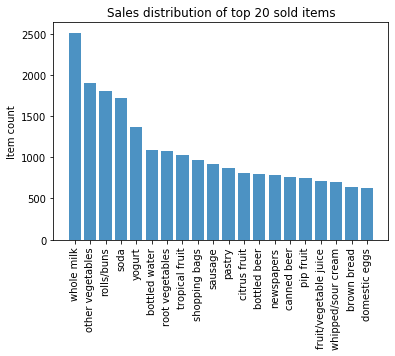

In [11]:
objects = (list(item_sort_df['item_name'].head(20)))
y = np.arange(len(objects))
count = list(item_sort_df['item_count'].head(20))
 
plt.bar(y, count, align='center', alpha=0.8)
plt.xticks(y, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Sales distribution of top 20 sold items')

# Contribution of top 20 "sold items" to total sales

In [12]:
item_sort_df['item_perc'] = item_sort_df['item_count']/total_count_of_items #each item's contribution 
item_sort_df['total_perc'] = item_sort_df.item_perc.cumsum() #cumulative contribution of top items

print(item_sort_df[item_sort_df.total_perc <= 0.5].shape)

item_sort_df.head(20)


(19, 4)


,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


# Make Orange Table

In [23]:
#refer : https://docs.biolab.si//3/data-mining-library/reference/data.domain.html
#refer: https://docs.biolab.si//3/data-mining-library/reference/data.variable.html

input_assoc_rules = grocery_df
domain_grocery = Domain([DiscreteVariable.make(name='item',values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.as_matrix(),Y= None)
data_gro_1

C:\Users\hkman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[[0, 1, 0, 0, 0, ...],
 [0, 0, 0, 0, 0, ...],
 [0, 0, 0, 0, 0, ...],
 [0, 0, 0, 0, 0, ...],
 [0, 0, 0, 0, 0, ...],
 ...
]

# Prune Dataset for frequently purchased items

In [55]:
def prune_dataset(input_df, length_trans, total_sales_perc, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()  
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items  #each percent
        item_count['total_perc'] = item_count.item_perc.cumsum()     #cumulative
        selected_items= list(item_count[item_count.total_perc < total_sales_perc].item_name.sort_values())
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]   #transactions with at least length_trans items
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc] #comparing cumulative perc
    
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]

In [78]:
output_df, item_counts = prune_dataset(input_df=grocery_df, length_trans=2,total_sales_perc=0.4)
print("Shape: ",output_df.shape)
print("Selected items: ", list(output_df.columns))

Shape:  (4585, 13)
Selected items:  ['bottled beer', 'bottled water', 'citrus fruit', 'other vegetables', 'pastry', 'rolls/buns', 'root vegetables', 'sausage', 'shopping bags', 'soda', 'tropical fruit', 'whole milk', 'yogurt']


# Association Rule Mining with FP Growth

In [64]:
input_assoc_rules = output_df  
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.as_matrix(),Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

C:\Users\hkman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
min_support=0.01
num_trans = input_assoc_rules.shape[0]*min_support
print("Number of required transactions = ", int(num_trans))
itemsets = dict(frequent_itemsets(data_gro_1_en, min_support=min_support))   #dict-- key:value pair
print(len(itemsets), " itemsets have a support of ", min_support*100, "%")

Number of required transactions =  45
166886  itemsets have a support of  1.0 %


In [74]:
confidence = 0.3
rules_df = pd.DataFrame()

if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]
    print(len(rules))

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_antecedent = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_from_rule_stat in rule_stats:
        ante = ex_rule_from_rule_stat[0]            
        cons = ex_rule_from_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_antecedent:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_antecedent]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_from_rule_stat[2],
                             'confidence' : ex_rule_from_rule_stat[3],
                             'coverage' : ex_rule_from_rule_stat[4],
                             'strength' : ex_rule_from_rule_stat[5],
                             'lift' : ex_rule_from_rule_stat[6],
                             'leverage' : ex_rule_from_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

995182
Raw rules data frame of 16628 rules generated


# Sorting the rules in grocery dataset

In [75]:
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False))

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, tropical fruit, whole milk",228,0.463636,2.230611
5,sausage,"shopping bags, rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt, root vegetables, whole milk",92,0.429907,2.156588
1,citrus fruit,"other vegetables, tropical fruit, whole milk",66,0.333333,2.125637
10,yogurt,"tropical fruit, whole milk",199,0.484211,1.891061
2,other vegetables,"yogurt, whole milk",228,0.643836,1.826724
6,shopping bags,"sausage, soda",50,0.304878,1.782992
0,bottled water,"yogurt, soda",59,0.333333,1.707635
9,whole milk,"yogurt, tropical fruit, root vegetables",228,0.754098,1.703222
3,rolls/buns,"yogurt, whole milk",97,0.522222,1.679095
